# Lyrical Analysis

## Word Cloud and Sentiment

This notebook contains a Python script that analyzes song lyrics. The analysis is performed in two parts:

1. **Word Cloud Visualization**: The script takes a string of song lyrics and generates a word cloud. This visualization helps understand the frequency of words in the song lyrics. The most frequently occurring words appear larger in the word cloud. In this script, we use the `CountVectorizer` from sklearn to convert text data into a matrix of word counts. We then use the `WordCloud` function from the wordcloud library to generate the visualization.

2. **Sentiment Analysis**: The script also performs sentiment analysis on the song lyrics using the `SentimentIntensityAnalyzer` from the nltk library. Sentiment analysis is the process of determining the emotional tone behind a series of words. It is used to gain an understanding of the attitudes, opinions and emotions expressed within the text.

To use the script, call the function `analyze_lyrics()` with your song lyrics as an argument. The function will display the word cloud and print the sentiment scores.

```python
analyze_lyrics("your song lyrics here")


In [19]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from PIL import Image

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jakehclark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Function to use NLTK to:
    - Tokenize
    - Count word frequencies
      - Create frequency dictionary 
    - Generate word cloud
    - Use SentimentIntensityAnalyzer to get sentiment scores
      - Score Categories:
        - `neg` Negative: A measure of how negative the text is (0 = not negative, 1 = very negative)
        - `neu` Neutral: A measure of how neutral the text is (0 = very neutral, 1 = not neutral)
        - `pos` Positive: A measure of how positive the text is (0 = not positive, 1 = very positive)
        - `compound` Compound: A measure of the overall sentiment of the text (0 = very negative, 1 = very positive)

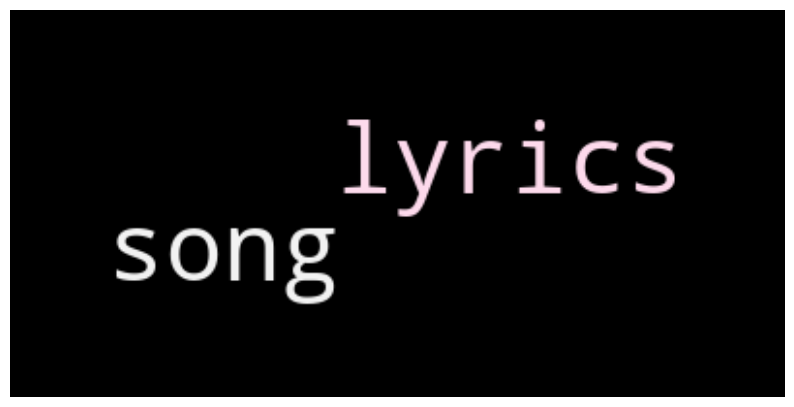

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [28]:
def analyze_lyrics(lyrics):
    """
    This function takes a string of song lyrics, creates a word cloud visualization, 
    and performs sentiment analysis.
    
    Parameters:
    lyrics (str): The song lyrics to analyze.
    """
    
    # Instantiate a CountVectorizer object to transform the text data into a bag-of-words
    vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the data
    word_count = vectorizer.fit_transform([lyrics])

    # Sum up the counts of each vocabulary word
    word_freq = word_count.sum(axis=0).tolist()[0]

    # Get feature names (words) from vectorizer
    words = vectorizer.get_feature_names_out()

    # Prepare a dictionary with words and their corresponding frequencies
    word_freq_dict = dict(zip(words, word_freq))

    # Generate a word cloud image
    wordcloud = WordCloud(background_color='black', colormap='Pastel1', max_font_size=50, max_words=100).generate_from_frequencies(word_freq_dict)

    # Display the generated image
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    # Perform sentiment analysis on the text data
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(lyrics)

    # Print the sentiment scores
    print(sentiment)

# Test
# analyze_lyrics("your song lyrics here")

## Word Cloud and Sentiment (Discography)

Total length of `lyric_string`: 225219


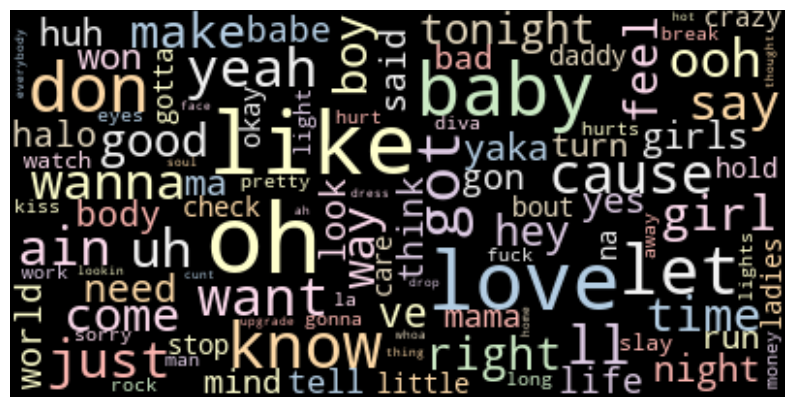

{'neg': 0.102, 'neu': 0.702, 'pos': 0.196, 'compound': 1.0}


In [55]:

import pandas as pd

df = pd.read_csv("./data/combined_lyrics.csv")
album_lyrics = df["lyric"].values

# Join all the strings in the array into a single string
lyrics_string = ' '.join(album_lyrics)

print(f"Total length of `lyric_string`: {len(lyrics_string)}")
# print(album_lyrics)

analyze_lyrics(lyrics_string)

### (Beyonce) Album Lyrics (`album_lyrics.csv`)

Definition of each column in the dataset:

- **artist**: Name of the artist
- **album**: Name of the album
- **track_title**: Title of the song
- **track_num**: Track number within the album
- **lyric**: Lyrics of the song
- **line**: Number of lines in each song
- **year**: Release year of the album

Source: [Kaggle](https://www.kaggle.com/datasets/hillaryosei/beyonce-lyrics)


## Word Cloud and Sentiment (Album)

In [25]:
#TODO:
    # # Create separate dataframes for each album
    # For each album, create a string stores all the lyrics for that album
    # Create a data visualization that compares the sentiment scores of all the albums


## Histogram (Single)

> ***Histogram**: A histogram can be used to show the distribution of word frequencies in your text. It divides the frequencies into bins and shows how many words fall into each bin. This can be useful for understanding the overall distribution of word frequencies, rather than focusing on individual words.*

In [57]:
## WIP

## Network Graph (Single)

> Network Graphs: If you're interested in not only the frequency of words but also their relationships with each other, a network graph could be a good choice. Nodes in the graph represent words, and edges between nodes indicate that those words often appear together. The size of the nodes can be proportional to word frequency. Libraries like NetworkX in combination with Matplotlib can help you create these visualizations.
>
> *🫠 I'm not sure this is useful, because the visualization doesn't seem to reveal any useful pattern. This may need to be tweaked, or perhaps instead of word frequency i should have a different `tokenizing` strategy. I'm not sure what that would be though. I'll have to do some research.*


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jakehclark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jakehclark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


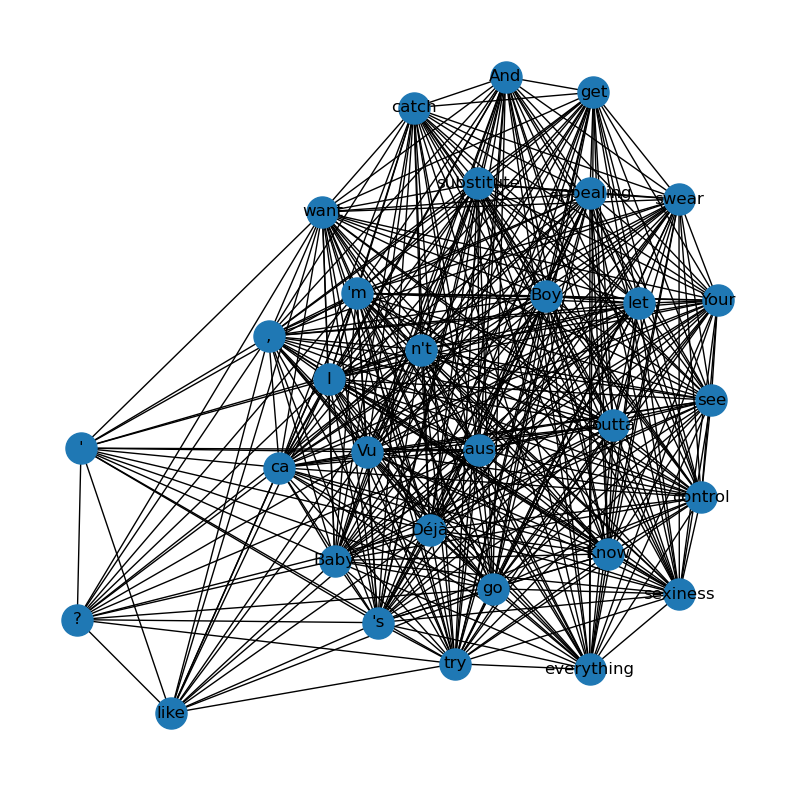

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from collections import defaultdict
from itertools import combinations
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# Download the stopwords from NLTK
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Lyrics for "Deja Vu" (replace with your own data)
lyrics = """
Bass (Uh) Hi-hat (Uh) 808 (Uh) Jay (Uh-huh, ready, uh-huh) Let's go get 'em (Uh-huh) C'mon (C'mon) I used to run base like Juan Pierre Now I run the bass hi-hat and the snare I used to bag girls like Birkin Bags Now I bag B (Boy, you hurtin' that) Brooklyn Bay where they birthed me at Now I be everywhere, the nerve of rap The audacity to have me with them curtains back Me and B, she about to sting, stand back Baby, seem like everywhere I go, I see you From your eyes, I smile, it's like I breathe you Helplessly, I reminisce, don't want to Compare nobody to you Boy, I try to catch myself, but I'm outta control Your sexiness is so appealing, I can't let it go Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Seeing things that I know can't be, am I dreaming? When I saw you walkin' past me, almost called your name Got a better glimpse and then I looked away Feels like I'm losin' it Boy, I try to catch myself, but I'm outta control Your sexiness is so appealing, I can't let it go Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Yes, Hova's flow so unusual Baby girl, you should already know It's H-O, light up the dro Cause you gon' need help tryna study my bounce Flow, blow, what's the difference? One you take in vein while the other you sniffin' It's still dope, po-po try to convict him Thats a no-go, my dough keep the scales tippin' Like 4-4s, like I'm from the H-O-U-S-T-O-N Blow wind, so Chicago of him Is he the best ever? That's the argu-a-ment I don't make the list, don't be mad at me I just make the hits like a factory I'm just one of, the one, nothin' after me No Déjà Vu, just me and my... (Oh!) Baby, I can't go anywhere Without thinking that you're there Seems like you're everywhere, it's true Gotta be having Deja Vu Cause in my mind, I want you here Get on the next plane, I don't care Is it because I'm missin' you That I'm having Déjà Vu? Boy, I try to catch myself, but I'm outta control Your sexiness is so appealing, I can't let it go Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu Know that I can't get over you Cause everything I see is you And I don't want no substitute Baby, I swear it's Déjà Vu
"""

# Split the lyrics into sentences
sentences = sent_tokenize(lyrics)

# Tokenize each sentence into words and remove stopwords
tokenized_sentences = [[word for word in word_tokenize(sentence) if word not in stop_words] for sentence in sentences]

# Create a defaultdict of an integer
co_occurrence = defaultdict(int)

# For each sentence
for sentence in tokenized_sentences:
    # For each pair of words in the sentence
    for i in combinations(sorted(set(sentence)), 2):
        # Increment the count
        co_occurrence[i] += 1

# Filter the co_occurrence to get only pairs with a count higher than a threshold (for example, 2)
filtered_co_occurrence = {pair: count for pair, count in co_occurrence.items() if count > 2}

# Create a graph
G = nx.Graph()

# Add edges to the graph
for pair, count in filtered_co_occurrence.items():
    G.add_edge(pair[0], pair[1], weight=count)

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
plt.axis("off")
plt.show()

